<a href="https://colab.research.google.com/github/fuat-arslan/NLP_Course/blob/main/NLP_Assignment1_BasicStatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment**: In this assignment, you will explore some of the fundamental laws of statistical natural language processing. Also, you will gain basic hands-on experience and skills to
devise your own language data, form a corpus and perform basic pre-processing on this data.
You are also expected to accumulate experience on writing technical documents, develop
an efficient organizational structure for your reports where you can present results of your
experiments and organize your findings, insights, and conclusions in a technical and precise
manner.


In [ ]:
#Imports
from urllib import request
import re
import string
import requests
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#Books
BOOKS_URL_5 = {
    "Author" : {
        'Dickens' : {
        'Great Expectations' :  'https://www.gutenberg.org/files/1400/1400-0.txt',
        'David Copperfield' :  'https://www.gutenberg.org/cache/epub/766/pg766.txt',
        'Martin Chuzzlewit' :  'https://www.gutenberg.org/files/968/968-0.txt' },

        'Dostoyevsky' : {
        'The Brothers Karamazov' : 'https://www.gutenberg.org/cache/epub/28054/pg28054.txt',
        'Crime and Punishment' : 'https://www.gutenberg.org/files/2554/2554-0.txt',
        'The Idiot' : 'https://www.gutenberg.org/files/2638/2638-0.txt'},

        'Hugo' : {

        'The Man Who Laughs' : 'https://www.gutenberg.org/cache/epub/12587/pg12587.txt',
        'Notre-Dame de Paris' : 'https://www.gutenberg.org/cache/epub/2610/pg2610.txt',
        'Les Misérables' : 'https://www.gutenberg.org/files/135/135-0.txt'},

        'Tolstoy' : {

        'Resurrection' : 'https://www.gutenberg.org/files/1938/1938-0.txt',
        'War and Peace' : 'https://www.gutenberg.org/cache/epub/2600/pg2600.txt',
        'Anna Karenina' : 'https://www.gutenberg.org/cache/epub/1399/pg1399.txt'},

        'Eliot' : {

        'Adam Bede' : 'https://www.gutenberg.org/cache/epub/507/pg507.txt',
        'The Mill on the Floss' : 'https://www.gutenberg.org/cache/epub/6688/pg6688.txt',
        'Middlemarch' : 'https://www.gutenberg.org/cache/epub/145/pg145.txt'}
    },
    "Type" : {
        'Sci-Fci' : {
        'The Mysterious Island' : 'https://www.gutenberg.org/cache/epub/1268/pg1268.txt',
        'The Country of the Blind, and Other Stories' : 'https://www.gutenberg.org/cache/epub/11870/pg11870.txt',
        'Twenty Thousand Leagues Under the Seas: An Underwater Tour of the World' : 'https://www.gutenberg.org/files/2488/2488-0.txt'},
        'Horror':{
        'Dracula' : 'https://www.gutenberg.org/cache/epub/345/pg345.txt',
        'The Phantom of the Opera' : 'https://www.gutenberg.org/cache/epub/175/pg175.txt',
        'Varney the Vampire' : 'https://www.gutenberg.org/cache/epub/14833/pg14833.txt'},
        'Romance' : {
        'Perlycross: A Tale of the Western Hills' : 'https://www.gutenberg.org/cache/epub/45038/pg45038.txt',
        "My Wife and I" : 'https://www.gutenberg.org/cache/epub/47874/pg47874.txt',
        'The Man in the Iron Mask' : 'https://www.gutenberg.org/cache/epub/2759/pg2759.txt'},

    }
}

In [ ]:
#Books
BOOKS_URL = {
    "Author" : {
        'Dickens' : {
        'Great Expectations' :  'https://www.gutenberg.org/files/1400/1400-0.txt',
        'David Copperfield' :  'https://www.gutenberg.org/cache/epub/766/pg766.txt',
        'Martin Chuzzlewit' :  'https://www.gutenberg.org/files/968/968-0.txt' },

        'Dostoyevsky' : {
        'The Brothers Karamazov' : 'https://www.gutenberg.org/cache/epub/28054/pg28054.txt',
        'Crime and Punishment' : 'https://www.gutenberg.org/files/2554/2554-0.txt',
        'The Idiot' : 'https://www.gutenberg.org/files/2638/2638-0.txt'},

        'Hugo' : {

        'The Man Who Laughs' : 'https://www.gutenberg.org/cache/epub/12587/pg12587.txt',
        'Notre-Dame de Paris' : 'https://www.gutenberg.org/cache/epub/2610/pg2610.txt',
        'Les Misérables' : 'https://www.gutenberg.org/files/135/135-0.txt'}
    },
    "Type" : {
        'Sci-Fci' : {
        'The Mysterious Island' : 'https://www.gutenberg.org/cache/epub/1268/pg1268.txt',
        'The Country of the Blind, and Other Stories' : 'https://www.gutenberg.org/cache/epub/11870/pg11870.txt',
        'Twenty Thousand Leagues Under the Seas: An Underwater Tour of the World' : 'https://www.gutenberg.org/files/2488/2488-0.txt'},
        'Horror':{
        'Dracula' : 'https://www.gutenberg.org/cache/epub/345/pg345.txt',
        'The Phantom of the Opera' : 'https://www.gutenberg.org/cache/epub/175/pg175.txt',
        'Varney the Vampire' : 'https://www.gutenberg.org/cache/epub/14833/pg14833.txt'},
        'Romance' : {
        'Perlycross: A Tale of the Western Hills' : 'https://www.gutenberg.org/cache/epub/45038/pg45038.txt',
        "My Wife and I" : 'https://www.gutenberg.org/cache/epub/47874/pg47874.txt',
        'The Man in the Iron Mask' : 'https://www.gutenberg.org/cache/epub/2759/pg2759.txt'},

    }
}

In [ ]:
def text_scrap(url):
    response = request.urlopen(url)
    raw = response.read()
    text = raw.decode("utf-8-sig")
    return text

In [ ]:
def clean_first_last(text,title):
    try :
        end_phrase = "END OF THE PROJECT GUTENBERG EBOOK "
        start_phrase =  'START OF THE PROJECT GUTENBERG EBOOK '


        #print(start_phrase)
        s = re.search(start_phrase, text)
        e = re.search(end_phrase, text)

        s_idx = s.end()+4 + len(title)
        e_idx = e.start() - 4
    except:
        end_phrase = "END OF THIS PROJECT GUTENBERG EBOOK "
        start_phrase =  'START OF THIS PROJECT GUTENBERG EBOOK '
        #print(start_phrase)

        s = re.search(start_phrase, text)
        e = re.search(end_phrase, text)

        s_idx = s.end()+ 4 + len(title)
        e_idx = e.start() - 4

    return text[s_idx:e_idx]


In [ ]:
def clean_and_tokenize(text):

    # no_punc = text.translate(str.maketrans('', '', string.punctuation))
    # no_punc_lower = no_punc.lower()

    # splitted = no_punc_lower.split()
    splitted = re.split(r'\W+', text.lower())
    return splitted

In [ ]:
# stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
# stopwords = set(stopwords_list.decode().splitlines())

stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
def remove_stops(token_list,stopwords_list ):
    tokens_wos = [token for token in token_list if token not in stopwords_list]
    return tokens_wos


In [ ]:
tt = text_scrap('https://www.gutenberg.org/cache/epub/11870/pg11870.txt')
tx = clean_first_last(tt,'The Country of the Blind, and Other Stories')

In [ ]:
tt[:800]

In [ ]:
tx[:100]

'\r\n\r\n\r\nE-text prepared by Paul Murray, Charles Bidwell, and Project Gutenberg\r\nDistributed Proofreade'

In [ ]:
token_list = clean_and_tokenize(tx)
no = remove_stops(token_list,stopwords)

In [ ]:
# merge tokens
' '.join(words)

We will itearete trough author's book and tokenize them for both with and withoud stop word and save their vacobulary.

In [ ]:
VOCAB = {}
BOOKS_no = {}
VOCAB_no = {}
BOOKS = {}
for coll in BOOKS_URL:
    VOCAB[coll] = {}
    VOCAB_no[coll] = {}
    BOOKS_no[coll] = {}
    BOOKS[coll] = {}
    for author in BOOKS_URL[coll]:
        VOCAB[coll][author] = {}
        VOCAB_no[coll][author] = {}
        BOOKS_no[coll][author] = {}
        BOOKS[coll][author] = {}
        for title in BOOKS_URL[coll][author]:
            print(title)
            tt = text_scrap(BOOKS_URL[coll][author][title])
            tx = clean_first_last(tt,title)
            token_list = clean_and_tokenize(tx)
            token_list_no = remove_stops(token_list,stopwords)
            tx_no = ' '.join(token_list_no)
            BOOKS[coll][author][title] = (tx,token_list)
            BOOKS_no[coll][author][title] = (tx_no,token_list_no)
            VOCAB[coll][author][title] = Counter(token_list)
            VOCAB_no[coll][author][title] = Counter(token_list_no)





Great Expectations
David Copperfield
Martin Chuzzlewit
The Brothers Karamazov
Crime and Punishment
The Idiot
The Man Who Laughs
Notre-Dame de Paris
Les Misérables
The Mysterious Island
The Country of the Blind, and Other Stories
Twenty Thousand Leagues Under the Seas: An Underwater Tour of the World
Dracula
The Phantom of the Opera
Varney the Vampire
Perlycross: A Tale of the Western Hills
My Wife and I
The Man in the Iron Mask


In [ ]:
def zipf_frequency(most_common_count, n=100):
    zipf_law = []
    for x in range(1, n+1):
        zipf_law.append(most_common_count/(x))
    return zipf_law


def df_Zipf(vocab,n = 200):
    corpora_l = pd.DataFrame(vocab.most_common(n), columns=['word', 'frequency'])
    corpora_l['rank'] = corpora_l.index +1
    corpora_l['k'] = corpora_l['frequency'] * corpora_l['rank']
    corpora_l['expected zipf frequency'] = zipf_frequency(corpora_l.loc[0, 'frequency'],len(corpora_l))
    return corpora_l

Zipf Author Corpora

<function matplotlib.pyplot.show(close=None, block=None)>

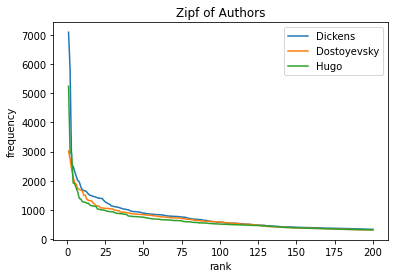

In [ ]:

for auth in VOCAB_no['Author']:
    titles = list(VOCAB_no['Author'][auth].keys())
    temp_vocab = VOCAB_no['Author'][auth][titles[0]] + VOCAB_no['Author'][auth][titles[1]] + VOCAB_no['Author'][auth][titles[2]]
    df = df_Zipf(temp_vocab)
    plt.plot(df["rank"], df["frequency"], label = auth )

plt.legend(loc="upper right")
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title('Zipf of Authors')
plt.show

In [ ]:
df

,word,frequency,rank,k,expected zipf frequency
0,said,7086,1,7086,7086.000000
1,mr,5821,2,11642,3543.000000
2,would,2567,3,7701,2362.000000
3,one,2491,4,9964,1771.500000
4,upon,2325,5,11625,1417.200000
...,...,...,...,...,...
195,strong,338,196,66248,36.153061
196,re,338,197,66586,35.969543
197,pretty,336,198,66528,35.787879
198,father,334,199,66466,35.608040


Booksb y spesific author

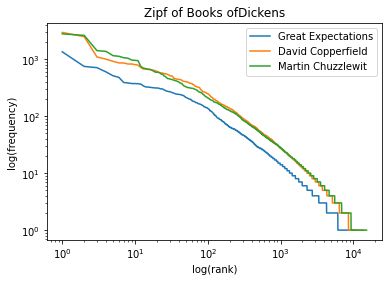

In [ ]:
auth = 'Dickens'
for title in VOCAB_no['Author'][auth]:

    temp_vocab = VOCAB_no['Author'][auth][title]
    df = df_Zipf(temp_vocab, None)
    plt.plot(df["rank"], df["frequency"], label = title )

plt.legend(loc="upper right")
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.title('Zipf of Books of' + auth)
plt.xscale('log')
plt.yscale('log')
plt.show()

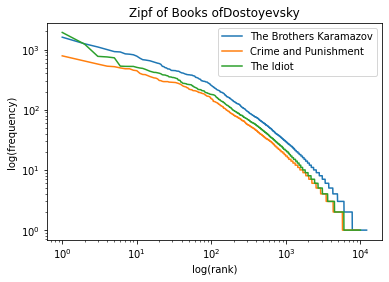

In [ ]:
auth = 'Dostoyevsky'
for title in VOCAB_no['Author'][auth]:

    temp_vocab = VOCAB_no['Author'][auth][title]
    df = df_Zipf(temp_vocab, None)
    plt.plot(df["rank"], df["frequency"], label = title )

plt.legend(loc="upper right")
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.title('Zipf of Books of' + auth )
plt.xscale('log')
plt.yscale('log')
plt.show()

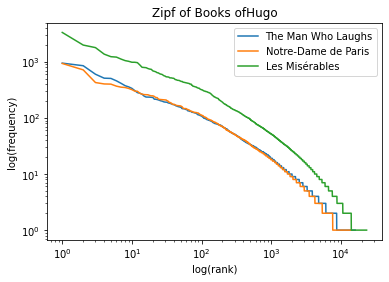

In [ ]:
auth = 'Hugo'
for title in VOCAB_no['Author'][auth]:

    temp_vocab = VOCAB_no['Author'][auth][title]
    df = df_Zipf(temp_vocab, None)
    plt.plot(df["rank"], df["frequency"], label = title )

plt.legend(loc="upper right")
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.title('Zipf of Books of' + auth)
plt.xscale('log')
plt.yscale('log')
plt.show()

g and rest is all about HEAPS' LAW

<function matplotlib.pyplot.show(close=None, block=None)>

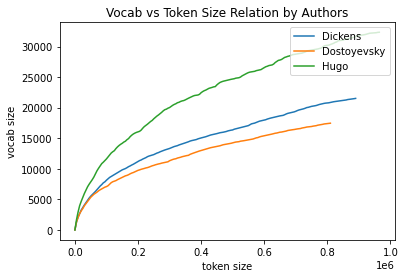

In [ ]:
for auth in BOOKS['Author']:
    token_subsamples = []
    total_ = []
    x = []
    for title in BOOKS['Author'][auth]:
        total_.extend(BOOKS['Author'][auth][title][1])

    for i in range(len(total_)//5000):
        token_subsamples.append(len(Counter(total_[:i*5000])))
        x.append(5000*i)

    plt.plot(x, token_subsamples, label = auth )

plt.legend(loc="upper right")
plt.xlabel('token size')
plt.ylabel('vocab size')
plt.title('Vocab vs Token Size Relation by Authors')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

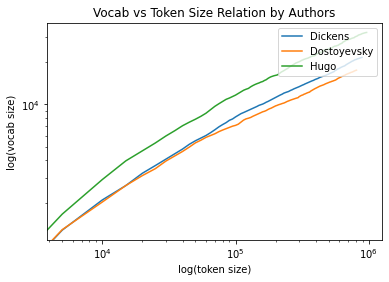

In [ ]:
for auth in BOOKS['Author']:
    token_subsamples = []
    total_ = []
    x = []
    for title in BOOKS['Author'][auth]:
        total_.extend(BOOKS['Author'][auth][title][1])

    for i in range(len(total_)//5000):
        token_subsamples.append(len(Counter(total_[:i*5000])))
        x.append(5000*i)

    plt.plot(x, token_subsamples, label = auth )

plt.legend(loc="upper right")
plt.xlabel('log(token size)')
plt.ylabel('log(vocab size)')
plt.title('Vocab vs Token Size Relation by Authors')
plt.xscale('log')
plt.yscale('log')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

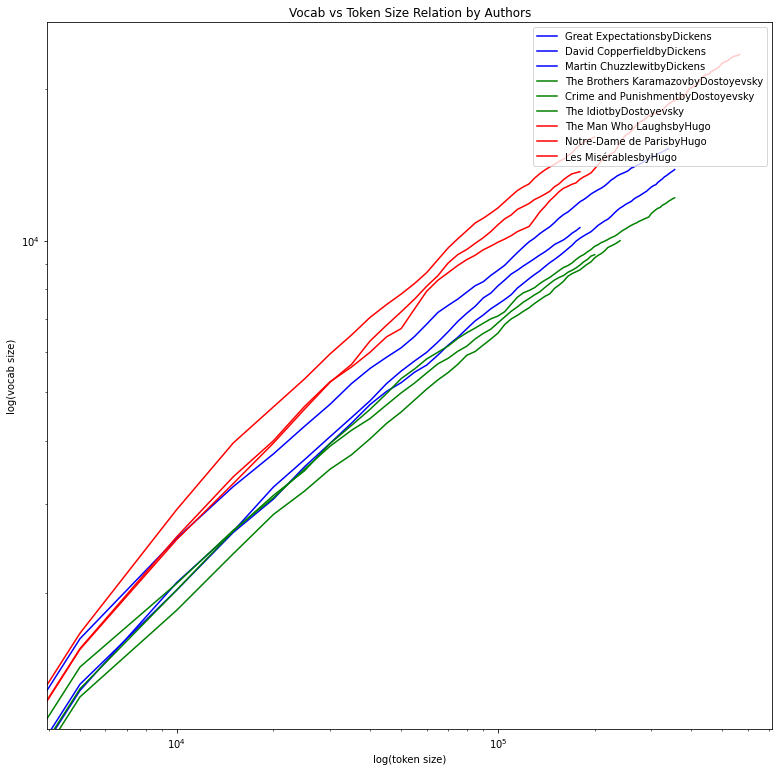

In [ ]:
color_list = ['b', 'g', 'r']
j=0
plt.figure(figsize=(13,13))
for auth in BOOKS['Author']:



    for title in BOOKS['Author'][auth]:
        total_ = BOOKS['Author'][auth][title][1]
        x = []
        token_subsamples = []
        for i in range(len(total_)//5000):
            token_subsamples.append(len(Counter(total_[:i*5000])))
            x.append(5000*i)

        plt.plot(x, token_subsamples, color_list[j],label = title + 'by' + auth )
    j += 1

plt.legend(loc="upper right")
plt.xlabel('log(token size)')
plt.ylabel('log(vocab size)')
plt.title('Vocab vs Token Size Relation by Authors')
plt.xscale('log')
plt.yscale('log')
plt.show

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly co

<function matplotlib.pyplot.show(close=None, block=None)>

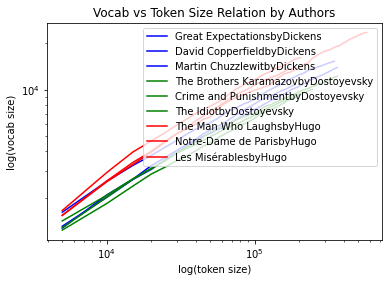

In [ ]:
color_list = ['b', 'g', 'r']
j=0
slopes = {}
for auth in BOOKS['Author']:



    for title in BOOKS['Author'][auth]:
        total_ = BOOKS['Author'][auth][title][1]
        x = []
        token_subsamples = []
        for i in range(len(total_)//5000):
            token_subsamples.append(len(Counter(total_[:(i+1)*5000])))
            x.append(5000*(i+1))
        slopes[title + 'by' + auth], intercept = np.polyfit(np.log(np.array(x)), np.log(np.array(token_subsamples)), 1)


        plt.plot(x, token_subsamples, color_list[j],label = title + 'by' + auth )
    j += 1

plt.legend(loc="upper right")
plt.xlabel('log(token size)')
plt.ylabel('log(vocab size)')
plt.title('Vocab vs Token Size Relation by Authors')
plt.xscale('log')
plt.yscale('log')
plt.show

In [ ]:
SLOPES = pd.DataFrame(slopes.items(), columns=['book', 'slope'] )

In [ ]:
SLOPES

,book,slope
0,Great ExpectationsbyDickens,0.571328
1,David CopperfieldbyDickens,0.526108
2,Martin ChuzzlewitbyDickens,0.507786
3,The Brothers KaramazovbyDostoyevsky,0.480952
4,Crime and PunishmentbyDostoyevsky,0.495682
5,The IdiotbyDostoyevsky,0.525199
6,The Man Who LaughsbyHugo,0.574861
7,Notre-Dame de ParisbyHugo,0.592698
8,Les MisérablesbyHugo,0.533604


<function matplotlib.pyplot.show(close=None, block=None)>

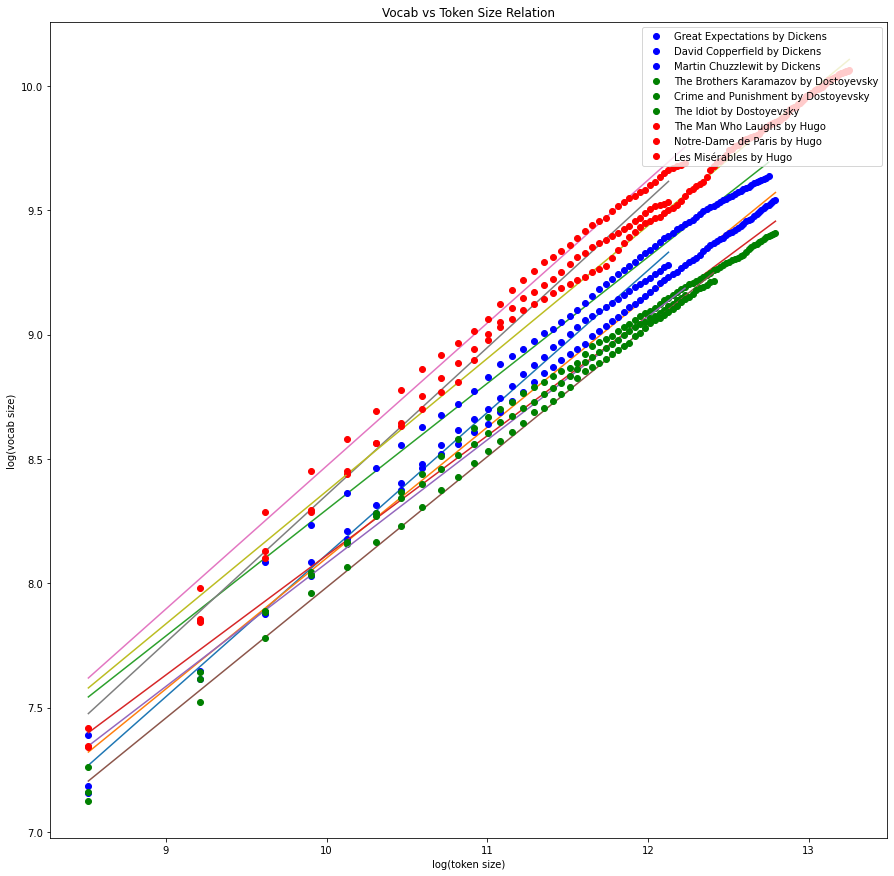

In [ ]:
color_list = ['bo', 'go', 'ro']
j=0
slopes = {}
plt.figure(figsize=(15,15
                    ))
for auth in BOOKS['Author']:



    for title in BOOKS['Author'][auth]:
        total_ = BOOKS['Author'][auth][title][1]
        x = []
        token_subsamples = []
        for i in range(len(total_)//5000):
            token_subsamples.append(len(Counter(total_[:(i+1)*5000])))
            x.append(5000*(i+1))

        trend = np.polyfit(np.log(np.array(x)), np.log(np.array(token_subsamples)), 1)
        slopes[title + ' by ' + auth] = trend[0]

        trendpoly = np.poly1d(trend)
        plt.plot(np.log(np.array(x)),trendpoly(np.log(np.array(x))))

        plt.plot(np.log(np.array(x)), np.log(token_subsamples), color_list[j],label = title + ' by ' + auth )
    j += 1


plt.legend(loc="upper right")
plt.xlabel('log(token size)')
plt.ylabel('log(vocab size)')
plt.title('Vocab vs Token Size Relation')
#plt.xscale('log')
#plt.yscale('log')
plt.show

In [ ]:
SLOPES = pd.DataFrame(slopes.items(), columns=['book', 'slope'] )

In [ ]:
SLOPES

,book,slope
0,Great Expectations by Dickens,0.571328
1,David Copperfield by Dickens,0.526108
2,Martin Chuzzlewit by Dickens,0.507786
3,The Brothers Karamazov by Dostoyevsky,0.480952
4,Crime and Punishment by Dostoyevsky,0.495682
5,The Idiot by Dostoyevsky,0.525199
6,The Man Who Laughs by Hugo,0.574861
7,Notre-Dame de Paris by Hugo,0.592698
8,Les Misérables by Hugo,0.533604


In [ ]:
df

,word,frequency,rank,k,expected zipf frequency
0,one,3348,1,3348,3348.000000
1,man,1994,2,3988,1674.000000
2,said,1796,3,5388,1116.000000
3,marius,1374,4,5496,837.000000
4,jean,1237,5,6185,669.600000
...,...,...,...,...,...
23494,queue_,1,23495,23495,0.142498
23495,conch,1,23496,23496,0.142492
23496,fafiot,1,23497,23497,0.142486
23497,sérieux,1,23498,23498,0.142480


#J repeat for non author part :(((

<function matplotlib.pyplot.show(close=None, block=None)>

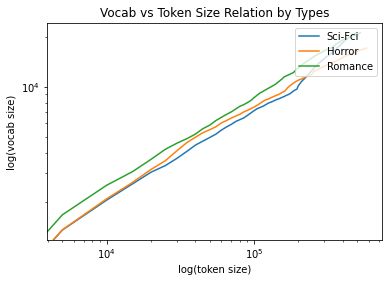

In [ ]:
for auth in BOOKS['Type']:
    token_subsamples = []
    total_ = []
    x = []
    for title in BOOKS['Type'][auth]:
        total_.extend(BOOKS['Type'][auth][title][1])

    for i in range(len(total_)//5000):
        token_subsamples.append(len(Counter(total_[:i*5000])))
        x.append(5000*i)

    plt.plot(x, token_subsamples, label = auth )

plt.legend(loc="upper right")
plt.xlabel('log(token size)')
plt.ylabel('log(vocab size)')
plt.title('Vocab vs Token Size Relation by Types')
plt.xscale('log')
plt.yscale('log')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

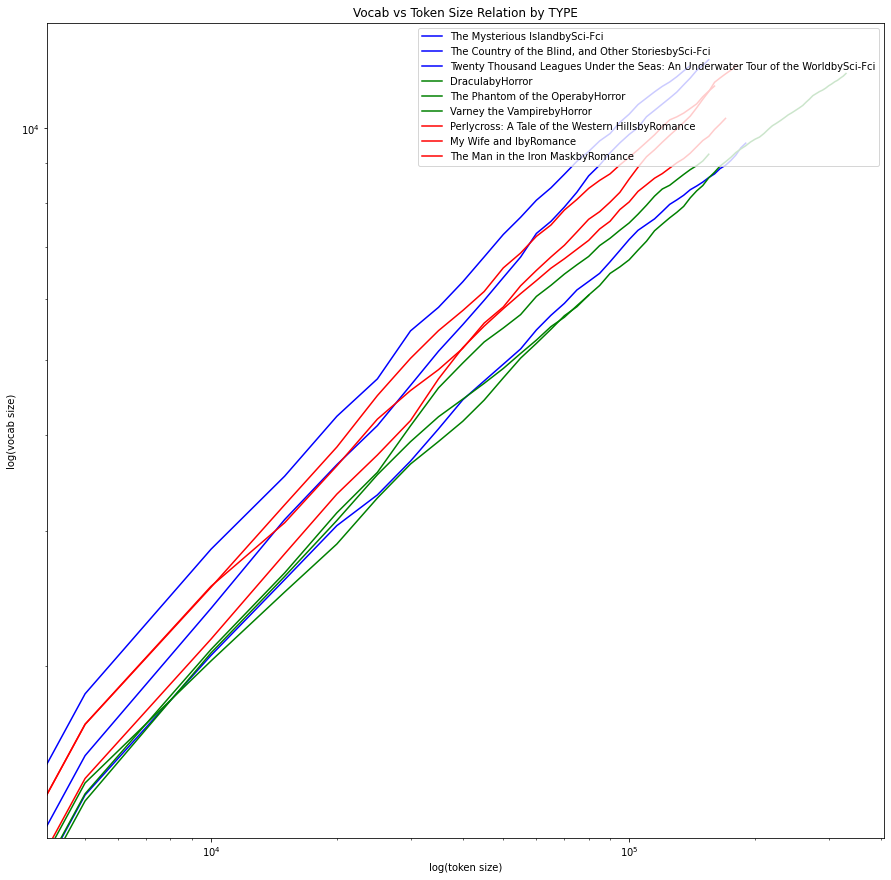

In [ ]:
color_list = ['b', 'g', 'r']
j=0
plt.figure(figsize=(15,15))
for auth in BOOKS['Type']:



    for title in BOOKS['Type'][auth]:
        total_ = BOOKS['Type'][auth][title][1]
        x = []
        token_subsamples = []
        for i in range(len(total_)//5000):
            token_subsamples.append(len(Counter(total_[:i*5000])))
            x.append(5000*i)

        plt.plot(x, token_subsamples, color_list[j],label = title + 'by' + auth )
    j += 1

plt.legend(loc="upper right")
plt.xlabel('log(token size)')
plt.ylabel('log(vocab size)')
plt.title('Vocab vs Token Size Relation by TYPE')
plt.xscale('log')
plt.yscale('log')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

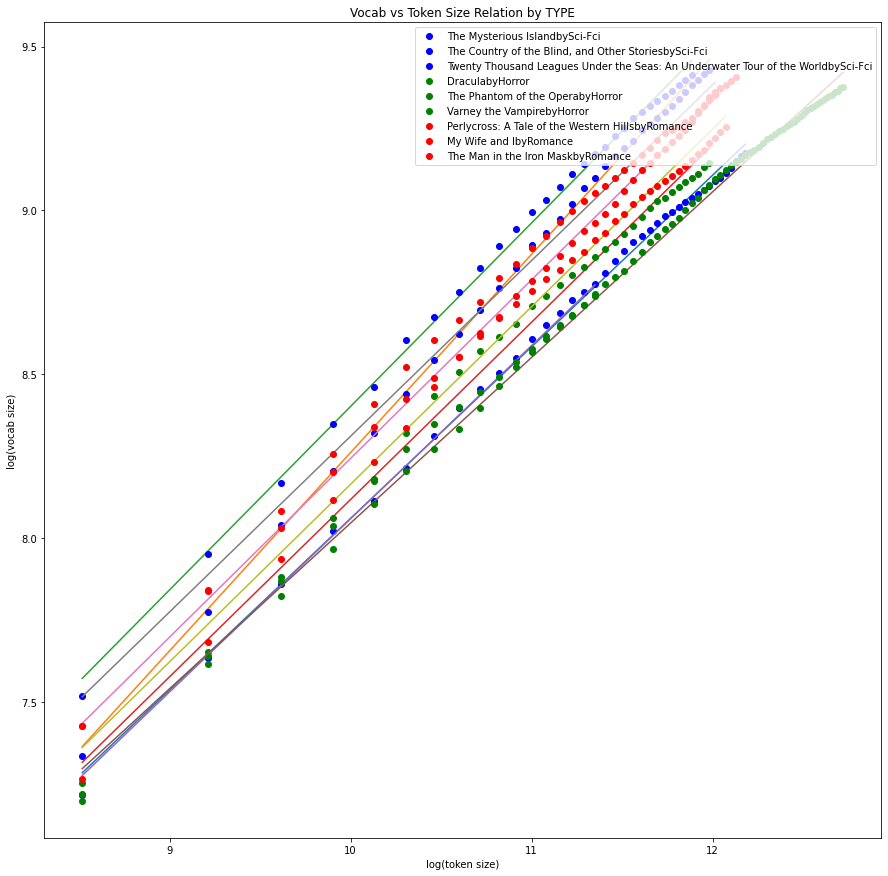

In [ ]:
color_list = ['bo', 'go', 'ro']
j=0
slopes = {}
plt.figure(figsize=(15,15))
for auth in BOOKS['Type']:



    for title in BOOKS['Type'][auth]:
        total_ = BOOKS['Type'][auth][title][1]
        x = []
        token_subsamples = []
        for i in range(len(total_)//5000):
            token_subsamples.append(len(Counter(total_[:(i+1)*5000])))
            x.append(5000*(i+1))

        trend = np.polyfit(np.log(np.array(x)), np.log(np.array(token_subsamples)), 1)
        slopes[title + ' from ' + auth] = trend[0]

        trendpoly = np.poly1d(trend)
        plt.plot(np.log(np.array(x)),trendpoly(np.log(np.array(x))))

        plt.plot(np.log(np.array(x)), np.log(token_subsamples), color_list[j],label = title + 'by' + auth )
    j += 1


plt.legend(loc="upper right")
plt.xlabel('log(token size)')
plt.ylabel('log(vocab size)')
plt.title('Vocab vs Token Size Relation by TYPE')
#plt.xscale('log')
#plt.yscale('log')
plt.show

In [ ]:
SLOPES = pd.DataFrame(slopes.items(), columns=['book', 'slope'] )
SLOPES

,book,slope
0,The Mysterious Island from Sci-Fci,0.523642
1,"The Country of the Blind, and Other Stories fr...",0.605080
2,Twenty Thousand Leagues Under the Seas: An Und...,0.559863
3,Dracula from Horror,0.540975
4,The Phantom of the Opera from Horror,0.528566
5,Varney the Vampire from Horror,0.505440
6,Perlycross: A Tale of the Western Hills from R...,0.545253
7,My Wife and I from Romance,0.536242
8,The Man in the Iron Mask from Romance,0.541969


#**PArt L without stopwords**

<function matplotlib.pyplot.show(close=None, block=None)>

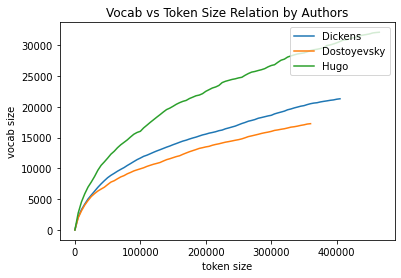

In [ ]:
for auth in BOOKS_no['Author']:
    token_subsamples = []
    total_ = []
    x = []
    for title in BOOKS_no['Author'][auth]:
        total_.extend(BOOKS_no['Author'][auth][title][1])

    for i in range(len(total_)//5000):
        token_subsamples.append(len(Counter(total_[:i*5000])))
        x.append(5000*i)

    plt.plot(x, token_subsamples, label = auth )

plt.legend(loc="upper right")
plt.xlabel('token size')
plt.ylabel('vocab size')
plt.title('Vocab vs Token Size Relation by Authors')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

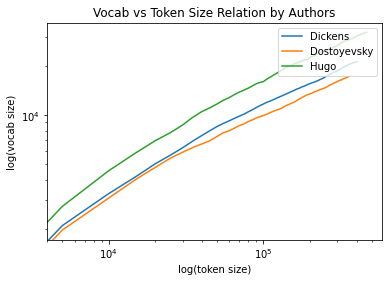

In [ ]:
for auth in BOOKS_no['Author']:
    token_subsamples = []
    total_ = []
    x = []
    for title in BOOKS_no['Author'][auth]:
        total_.extend(BOOKS_no['Author'][auth][title][1])

    for i in range(len(total_)//5000):
        token_subsamples.append(len(Counter(total_[:i*5000])))
        x.append(5000*i)

    plt.plot(x, token_subsamples, label = auth )

plt.legend(loc="upper right")
plt.xlabel('log(token size)')
plt.ylabel('log(vocab size)')
plt.title('Vocab vs Token Size Relation by Authors')
plt.xscale('log')
plt.yscale('log')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

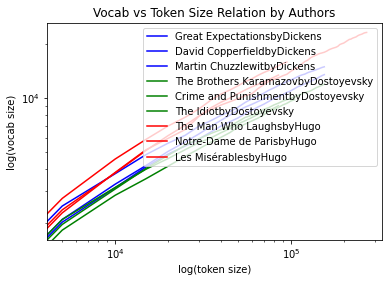

In [ ]:
color_list = ['b', 'g', 'r']
j=0
for auth in BOOKS_no['Author']:



    for title in BOOKS_no['Author'][auth]:
        total_ = BOOKS_no['Author'][auth][title][1]
        x = []
        token_subsamples = []
        for i in range(len(total_)//5000):
            token_subsamples.append(len(Counter(total_[:i*5000])))
            x.append(5000*i)

        plt.plot(x, token_subsamples, color_list[j],label = title + 'by' + auth )
    j += 1

plt.legend(loc="upper right")
plt.xlabel('log(token size)')
plt.ylabel('log(vocab size)')
plt.title('Vocab vs Token Size Relation by Authors')
plt.xscale('log')
plt.yscale('log')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

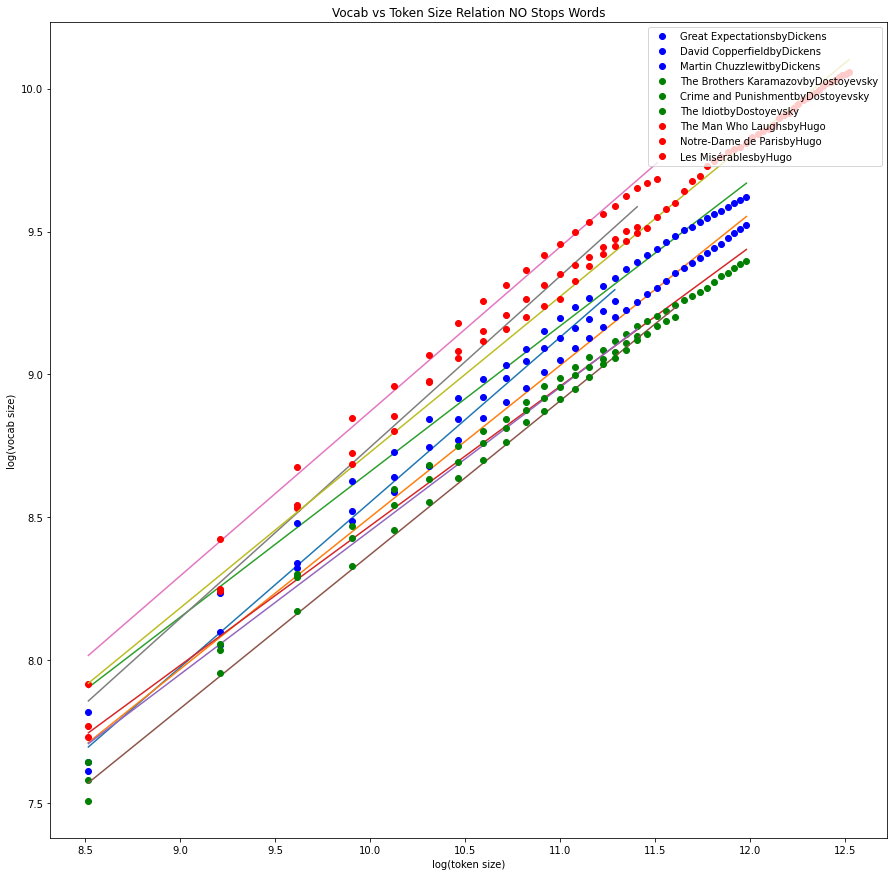

In [ ]:
color_list = ['bo', 'go', 'ro']
j=0
slopes = {}
plt.figure(figsize=(15,15))
for auth in BOOKS_no['Author']:



    for title in BOOKS_no['Author'][auth]:
        total_ = BOOKS_no['Author'][auth][title][1]
        x = []
        token_subsamples = []
        for i in range(len(total_)//5000):
            token_subsamples.append(len(Counter(total_[:(i+1)*5000])))
            x.append(5000*(i+1))

        trend = np.polyfit(np.log(np.array(x)), np.log(np.array(token_subsamples)), 1)
        slopes[title + 'by' + auth] = trend[0]

        trendpoly = np.poly1d(trend)
        plt.plot(np.log(np.array(x)),trendpoly(np.log(np.array(x))))

        plt.plot(np.log(np.array(x)), np.log(token_subsamples), color_list[j],label = title + 'by' + auth )
    j += 1


plt.legend(loc="upper right")
plt.xlabel('log(token size)')
plt.ylabel('log(vocab size)')
plt.title('Vocab vs Token Size Relation NO Stops Words')
#plt.xscale('log')
#plt.yscale('log')
plt.show

In [ ]:
SLOPES = pd.DataFrame(slopes.items(), columns=['book', 'slope'] )
SLOPES

,book,slope
0,Great ExpectationsbyDickens,0.577086
1,David CopperfieldbyDickens,0.531109
2,Martin ChuzzlewitbyDickens,0.509262
3,The Brothers KaramazovbyDostoyevsky,0.488044
4,Crime and PunishmentbyDostoyevsky,0.501952
5,The IdiotbyDostoyevsky,0.537993
6,The Man Who LaughsbyHugo,0.575405
7,Notre-Dame de ParisbyHugo,0.598296
8,Les MisérablesbyHugo,0.544682


<function matplotlib.pyplot.show(close=None, block=None)>

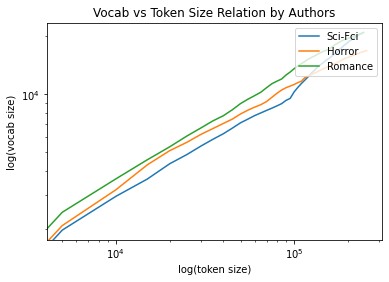

In [ ]:
for auth in BOOKS_no['Type']:
    token_subsamples = []
    total_ = []
    x = []
    for title in BOOKS_no['Type'][auth]:
        total_.extend(BOOKS_no['Type'][auth][title][1])

    for i in range(len(total_)//5000):
        token_subsamples.append(len(Counter(total_[:i*5000])))
        x.append(5000*i)

    plt.plot(x, token_subsamples, label = auth )

plt.legend(loc="upper right")
plt.xlabel('log(token size)')
plt.ylabel('log(vocab size)')
plt.title('Vocab vs Token Size Relation by Authors')
plt.xscale('log')
plt.yscale('log')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

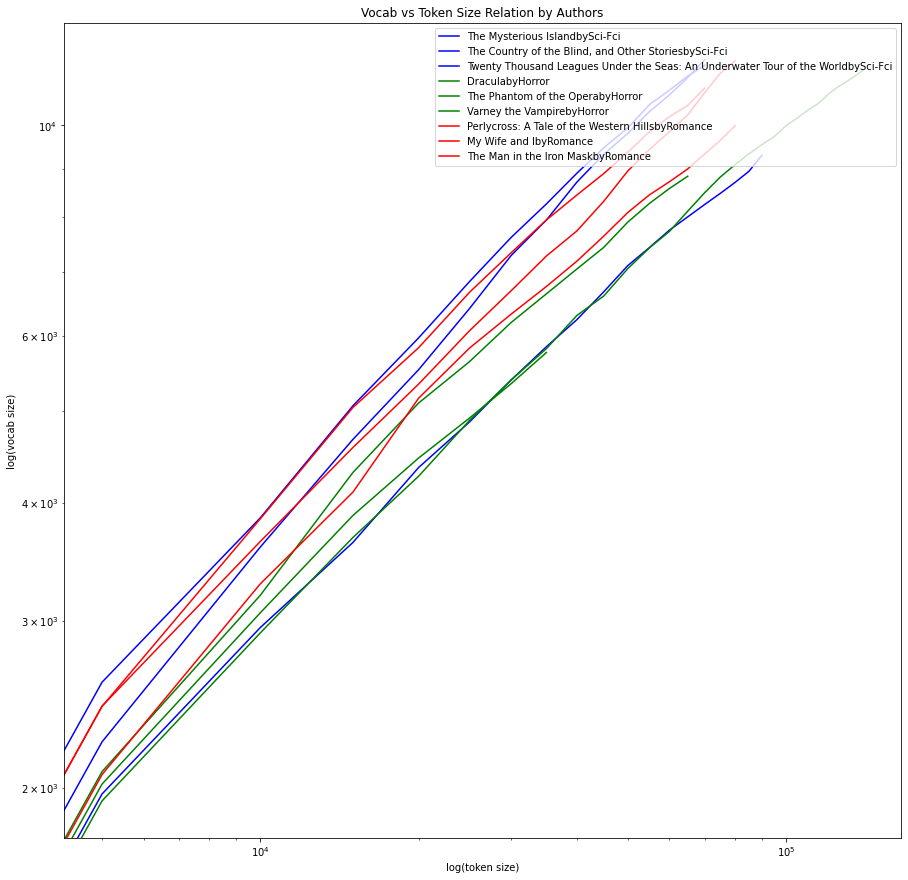

In [ ]:
color_list = ['b', 'g', 'r']
j=0
plt.figure(figsize=(15,15))
for auth in BOOKS_no['Type']:



    for title in BOOKS_no['Type'][auth]:
        total_ = BOOKS_no['Type'][auth][title][1]
        x = []
        token_subsamples = []
        for i in range(len(total_)//5000):
            token_subsamples.append(len(Counter(total_[:i*5000])))
            x.append(5000*i)

        plt.plot(x, token_subsamples, color_list[j],label = title + 'by' + auth )
    j += 1

plt.legend(loc="upper right")
plt.xlabel('log(token size)')
plt.ylabel('log(vocab size)')
plt.title('Vocab vs Token Size Relation by Authors')
plt.xscale('log')
plt.yscale('log')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

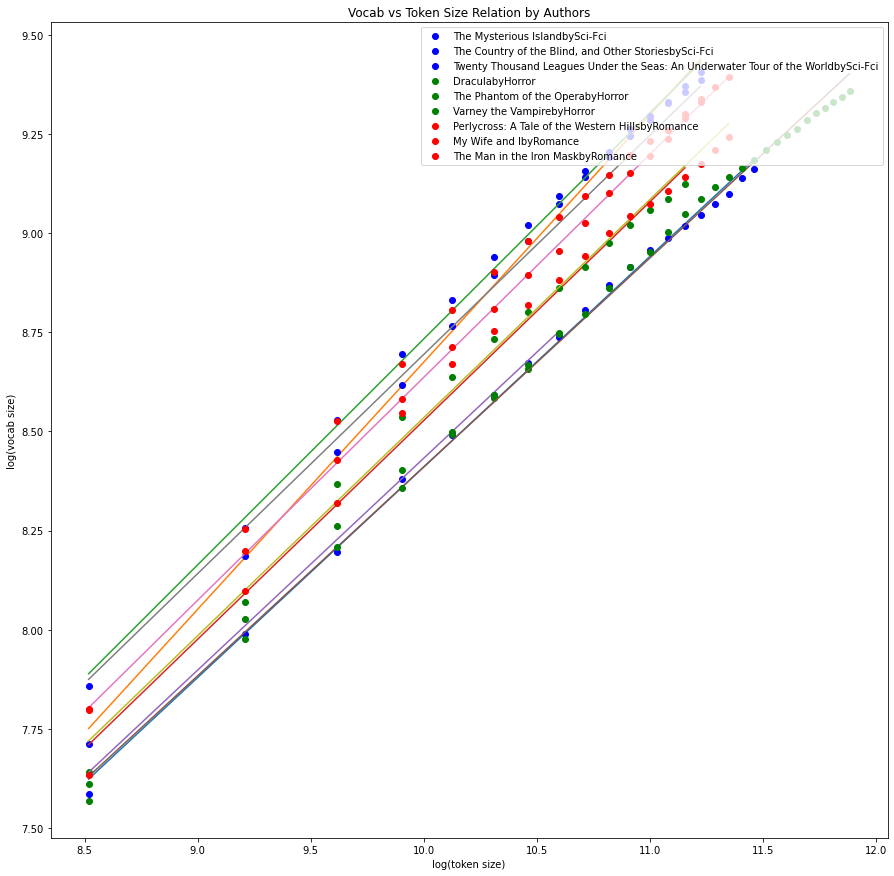

In [ ]:
color_list = ['bo', 'go', 'ro']
j=0
slopes = {}
plt.figure(figsize=(15,15))
for auth in BOOKS['Type']:



    for title in BOOKS_no['Type'][auth]:
        total_ = BOOKS_no['Type'][auth][title][1]
        x = []
        token_subsamples = []
        for i in range(len(total_)//5000):
            token_subsamples.append(len(Counter(total_[:(i+1)*5000])))
            x.append(5000*(i+1))

        trend = np.polyfit(np.log(np.array(x)), np.log(np.array(token_subsamples)), 1)
        slopes[title + 'by' + auth] = trend[0]

        trendpoly = np.poly1d(trend)
        plt.plot(np.log(np.array(x)),trendpoly(np.log(np.array(x))))

        plt.plot(np.log(np.array(x)), np.log(token_subsamples), color_list[j],label = title + 'by' + auth )
    j += 1


plt.legend(loc="upper right")
plt.xlabel('log(token size)')
plt.ylabel('log(vocab size)')
plt.title('Vocab vs Token Size Relation by Authors')
#plt.xscale('log')
#plt.yscale('log')
plt.show

#RAndom Corpus generator

In [ ]:
import random
import string

def generate_corpus(num_docs, max_doc_len):
    corpus = []
    for i in range(num_docs):
        doc_len = random.randint(1, max_doc_len)
        doc = ''.join(random.choice(string.ascii_lowercase) for _ in range(doc_len))
        corpus.append(doc)
    return corpus


In [ ]:
corpus = generate_corpus(2*len(BOOKS['Author']['Dickens']['Great Expectations'][0]),5)

In [ ]:
corpus

<function matplotlib.pyplot.show(close=None, block=None)>

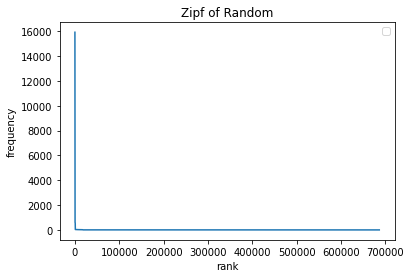

In [ ]:
df = df_Zipf(Counter(corpus),None)
plt.plot(df["rank"], df["frequency"] )

plt.legend(loc="upper right")
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title('Zipf of Random')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

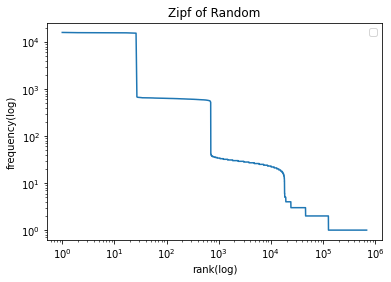

In [ ]:
df = df_Zipf(Counter(corpus),None)
plt.plot(df["rank"], df["frequency"] )

plt.legend(loc="upper right")
plt.xlabel('rank(log)')
plt.ylabel('frequency(log)')
plt.title('Zipf of Random')
plt.xscale('log')
plt.yscale('log')
plt.show

In [ ]:
token_subsamples = []
x = []
for i in range(len(corpus)//5000):
    token_subsamples.append(len(Counter(corpus[:i*5000])))
    x.append(5000*i)



<function matplotlib.pyplot.show(close=None, block=None)>

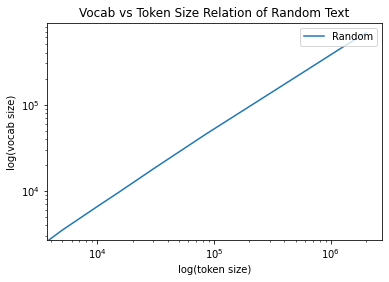

In [ ]:
plt.plot(x, token_subsamples,label = 'Random' )

plt.legend(loc="upper right")
plt.xlabel('log(token size)')
plt.ylabel('log(vocab size)')
plt.title('Vocab vs Token Size Relation of Random Text')
plt.xscale('log')
plt.yscale('log')

plt.show

<ipython-input-105-1258fd1eb6ae>:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.array(x)),trendpoly(np.log(np.array(x))))


Text(0.5, 1.0, 'Vocab vs Token Size Relation of Random Text')

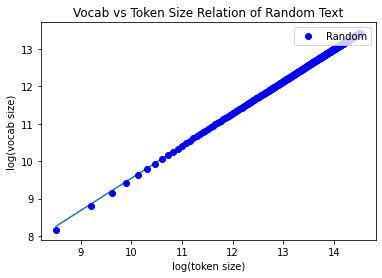

In [ ]:
trend = np.polyfit(np.log(np.array(x)[1:]), np.log(np.array(token_subsamples)[1:]), 1)
slope = trend[0]

trendpoly = np.poly1d(trend)
plt.plot(np.log(np.array(x)),trendpoly(np.log(np.array(x))))

plt.plot(np.log(np.array(x)[1:]), np.log(token_subsamples[1:]), 'bo',label ='Random' )
plt.legend(loc="upper right")
plt.xlabel('log(token size)')
plt.ylabel('log(vocab size)')
plt.title('Vocab vs Token Size Relation of Random Text')

In [ ]:
slope

0.8641752304101318

Random corpus from a vocab

In [ ]:


def generate_corpus(vocabulary, num_docs, max_doc_len):
    corpus = []
    vocab_items = list(vocabulary.items())
    for i in range(num_docs):
        doc_len = random.randint(1, max_doc_len)
        doc_words = []
        while len(doc_words) < doc_len:
            word, count = random.choice(vocab_items)
            if count > 0:
                doc_words.append(word)
                vocabulary[word] -= 1
        doc = ' '.join(doc_words)
        corpus.append(doc)
    return corpus
